In [365]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

In [366]:
df = pd.read_csv('wine_dataset.csv')

In [367]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [368]:
df.rename(columns={'type':'wine_type'},inplace=True)
df.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [369]:
print(f'Data Frame Shape (rows, columns): {df.shape}')

Data Frame Shape (rows, columns): (6497, 13)


In [342]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [343]:
len(df.quality.unique())

7

In [344]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
wine_type,0,0.000000
fixed acidity,10,0.001539
volatile acidity,8,0.001231
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [370]:
df.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [371]:
def get_missing_values(df):
    values = {}
    for feat in df.columns:
        if df[feat].isna().any():
            values[feat] = round(df[feat].mean(),2)
    return values

In [372]:
values = get_missing_values(df)

In [373]:
values

{'fixed acidity': 7.22,
 'volatile acidity': 0.34,
 'citric acid': 0.32,
 'residual sugar': 5.44,
 'chlorides': 0.06,
 'pH': 3.22,
 'sulphates': 0.53}

In [374]:
df.fillna(value=values,inplace=True)

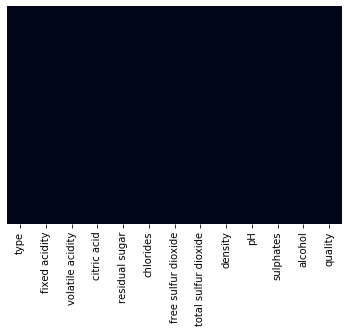

In [113]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [375]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
wine_type,0,0.0
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0


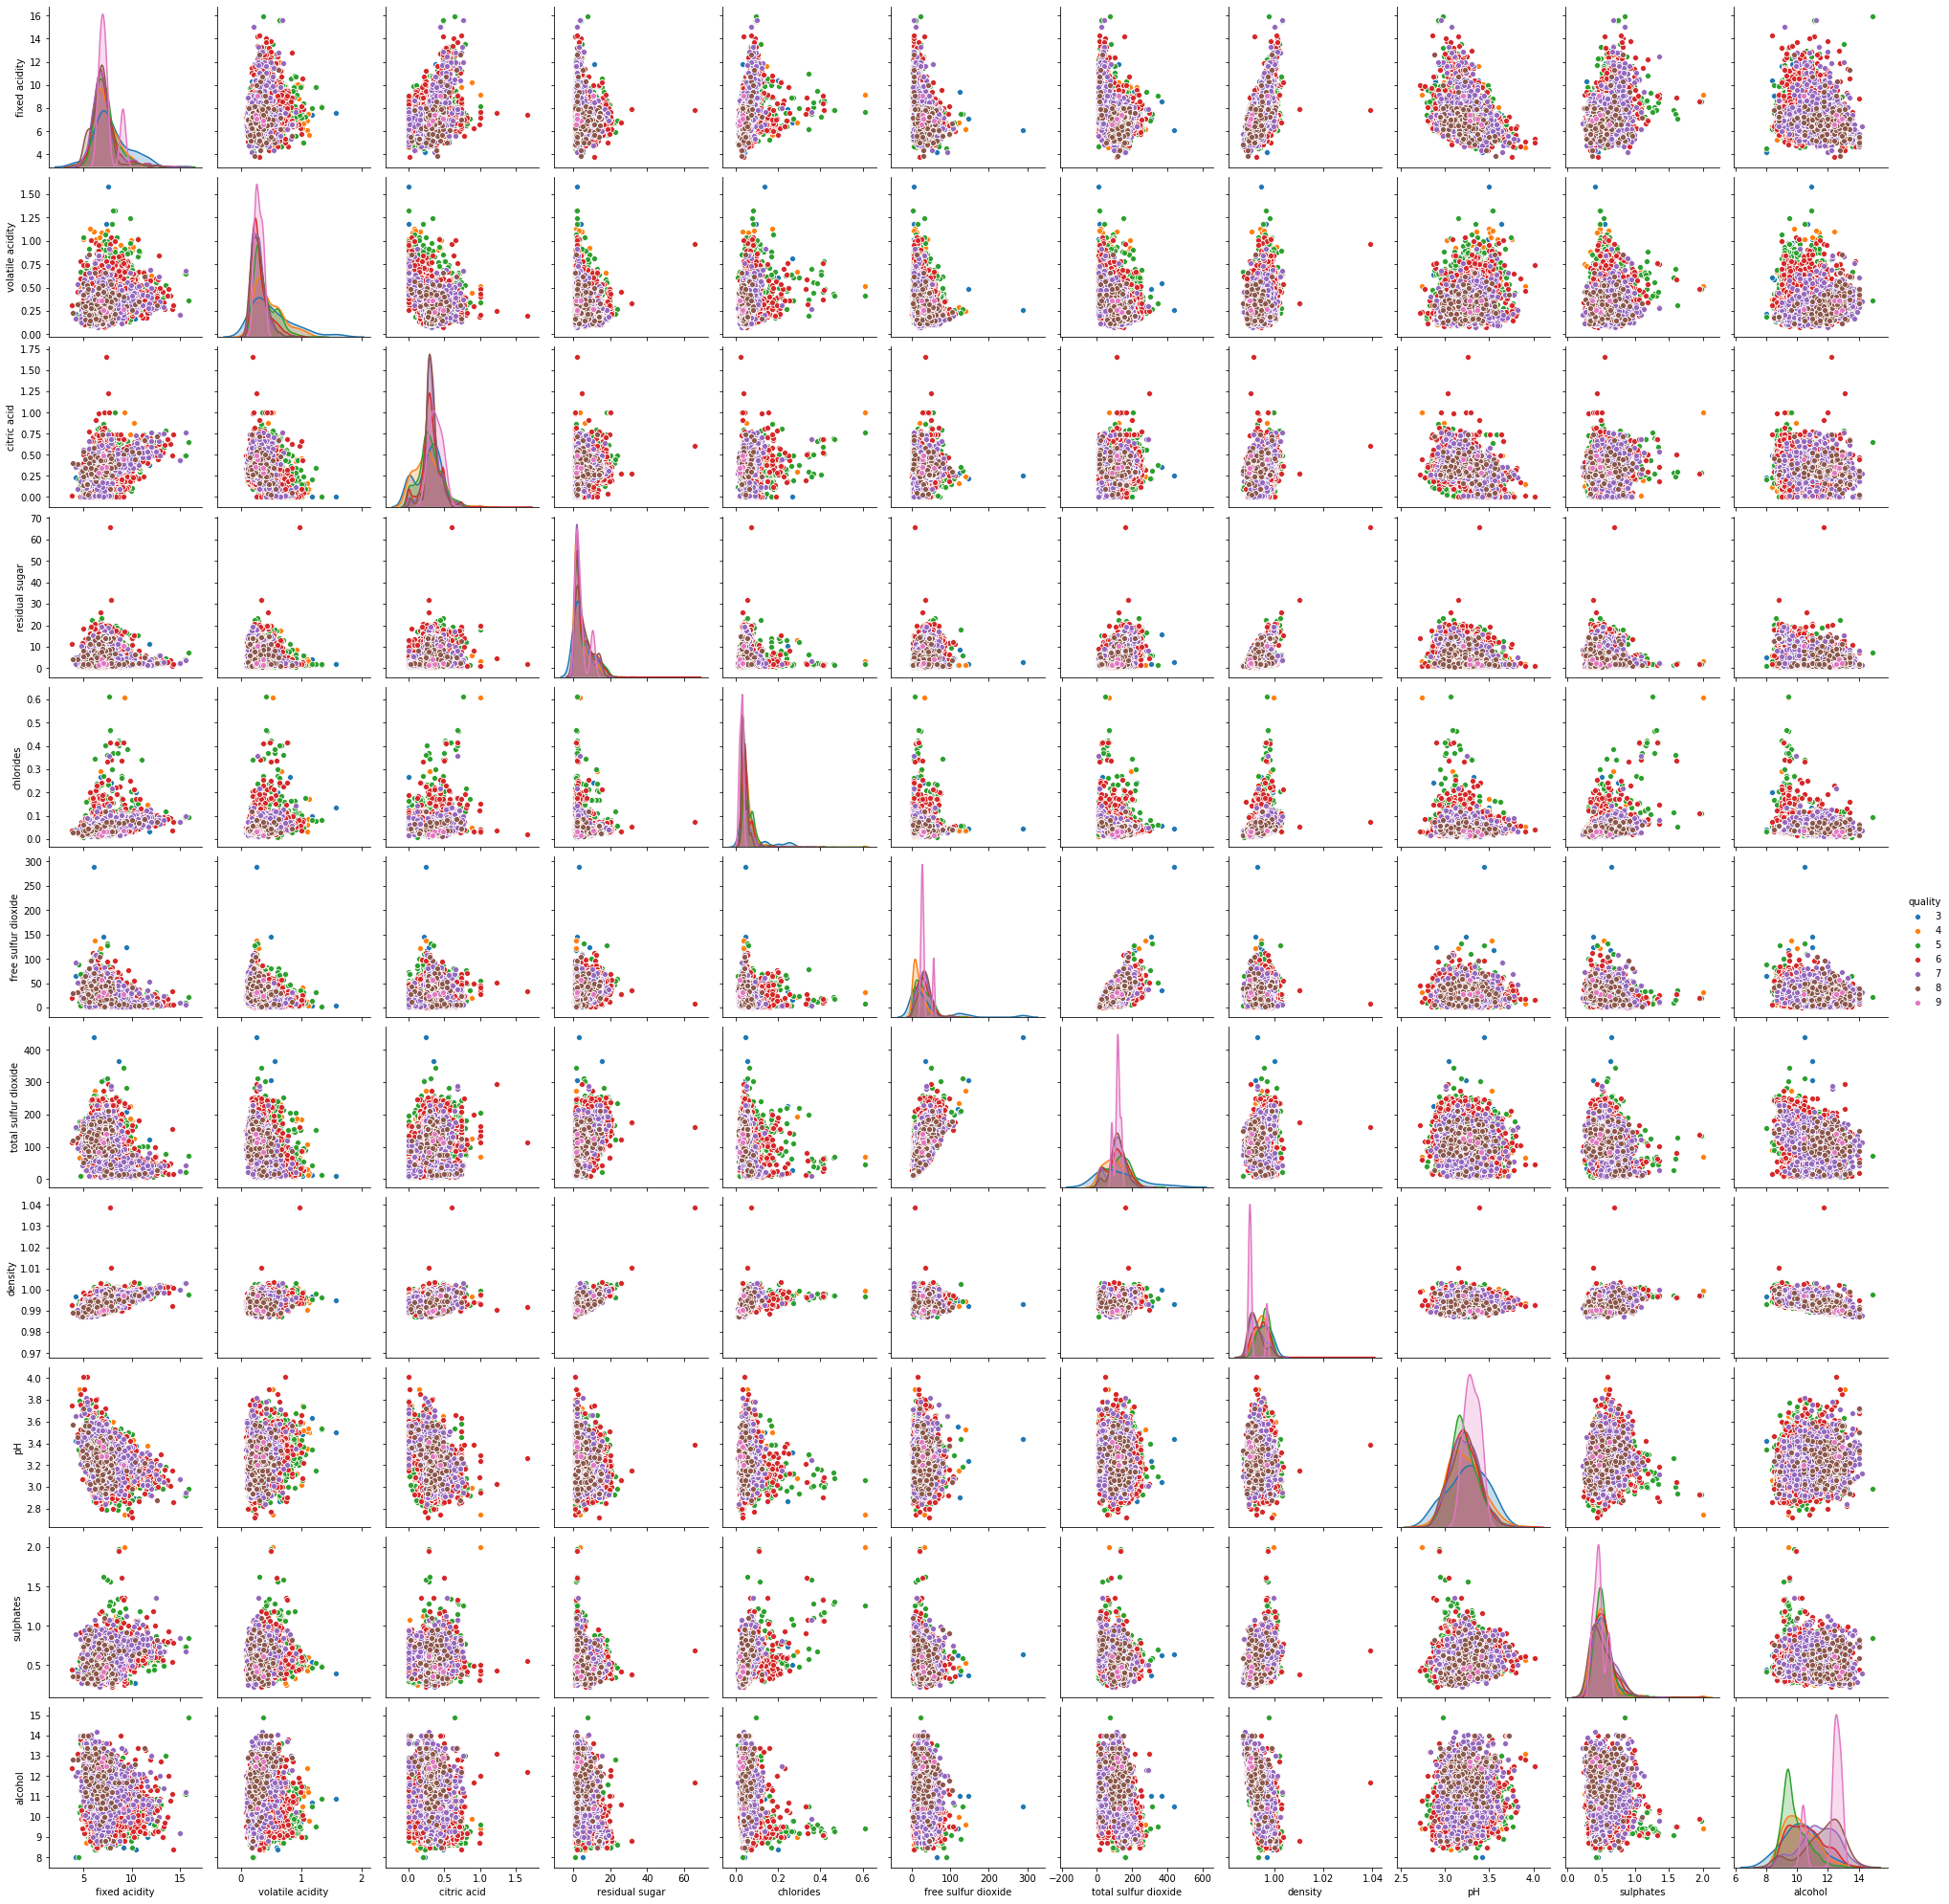

In [115]:
sns.pairplot(df, hue="quality")

Text(0, 0.5, 'correlation')

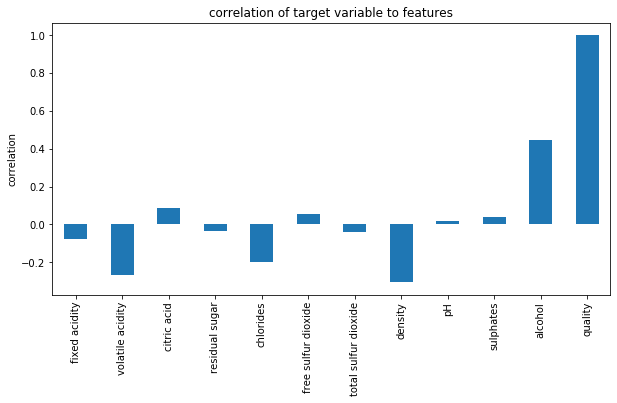

In [116]:
plt.figure(figsize=(10,5))
ax = df.corr()['quality'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

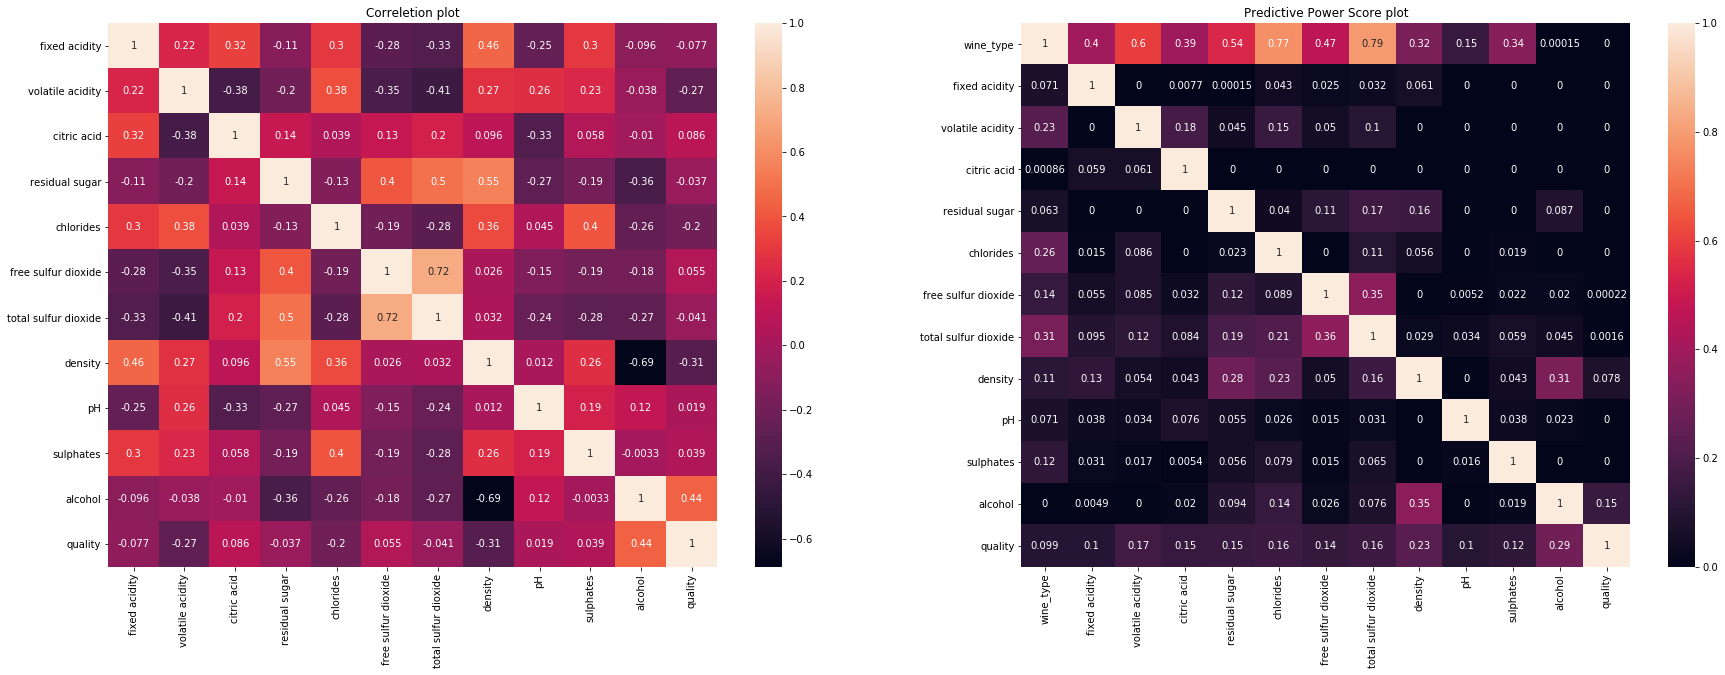

In [376]:
plt.figure(figsize=(30,10));plt.subplot(121,title = 'Correletion plot')
sns.heatmap(df.corr(),annot=True);plt.subplot(122,title='Predictive Power Score plot')
sns.heatmap(ps.matrix(df),annot=True)

In [377]:
df.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [378]:
df.wine_type = df.wine_type.map({'white':0, 'red':1})

In [379]:
df.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Text(0.5, 1.0, 'Wine quality')

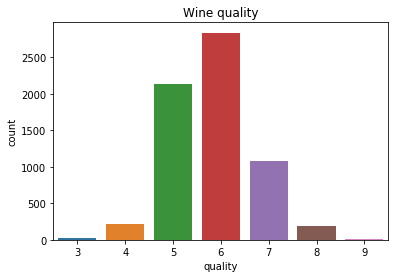

In [380]:
sns.countplot(data=df, x="quality").set_title("Wine quality")

In [400]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [382]:
X = df.drop(columns=['quality'],axis=1) 
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [383]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [384]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.47
Accuracy in Test  set   : 0.45


In [385]:
df_bins3= df.copy()

In [386]:
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0,'average'=1, 'high'=2

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins, labels=labels)

#df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

print(df_bins3[['quality_range','quality']].head(5))

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


Text(0.5, 1.0, 'Wine quality')

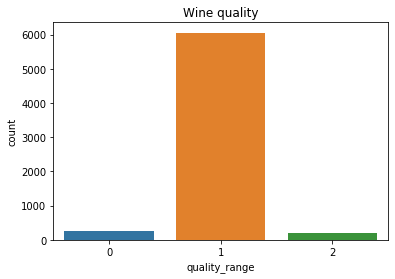

In [387]:
sns.countplot(data=df_bins3, x="quality_range").set_title("Wine quality")

In [388]:
df_bins3 = df_bins3.drop(columns=['quality'],axis=1).copy()

In [389]:
X = df_bins3.drop(columns=['quality_range'],axis=1) 
y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [390]:
X.columns

Index(['wine_type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [391]:
lr    = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [392]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy Score of Train Model : 0.93
Accuracy Score of Test  Model : 0.93


In [404]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [402]:
AutoML.fit(X_train,y_train)

Generation 1 - Current best internal CV score: 0.9428516695047012
Generation 2 - Current best internal CV score: 0.9428516695047012
Generation 3 - Current best internal CV score: 0.9428516695047012
Generation 4 - Current best internal CV score: 0.9428516695047012
Generation 5 - Current best internal CV score: 0.9430439771970089
Generation 6 - Current best internal CV score: 0.943044162286222
Generation 7 - Current best internal CV score: 0.943044162286222
Generation 8 - Current best internal CV score: 0.943044162286222
Generation 9 - Current best internal CV score: 0.9432366550677427
Generation 10 - Current best internal CV score: 0.9432366550677427

Best pipeline: KNeighborsClassifier(RFE(input_matrix, criterion=entropy, max_features=0.55, n_estimators=100, step=0.6500000000000001), n_neighbors=49, p=2, weights=distance)


TPOTClassifier(generations=10, verbosity=2)

In [405]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [406]:
AutoML.fit(X,y)
#save model 
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(lr,f)

Generation 1 - Current best internal CV score: 0.9318147687570321
Generation 2 - Current best internal CV score: 0.9318147687570321
Generation 3 - Current best internal CV score: 0.9318147687570321
Generation 4 - Current best internal CV score: 0.9318147687570321
Generation 5 - Current best internal CV score: 0.9318147687570321

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=20, p=2, weights=uniform)


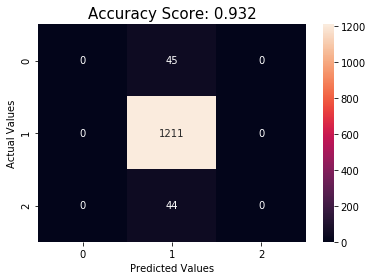

In [408]:
from sklearn.metrics import confusion_matrix as cm

predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [407]:
AutoML.export('pipeline.py')